In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving apps.csv to apps.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving user_reviews.csv to user_reviews.csv


In [ ]:
apps_df = pd.read_csv('apps.csv')
reviews_df = pd.read_csv('user_reviews.csv')

In [ ]:
apps_df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
apps_df = apps_df.drop(columns=['Unnamed: 0'])

In [ ]:
print("Shape of the dataset:", apps_df.shape)
print("Shape of the dataset:", reviews_df.shape)

Shape of the dataset: (9659, 13)
Shape of the dataset: (64295, 5)


In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
print(apps_df.isnull().sum())

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [ ]:
# Drop rows where Current Ver or Android Ver are missing
apps_df.dropna(subset=['Current Ver', 'Android Ver'], inplace=True)
print(apps_df.shape)

(9649, 13)


Checking for outliers in order to determine how to handle missing values

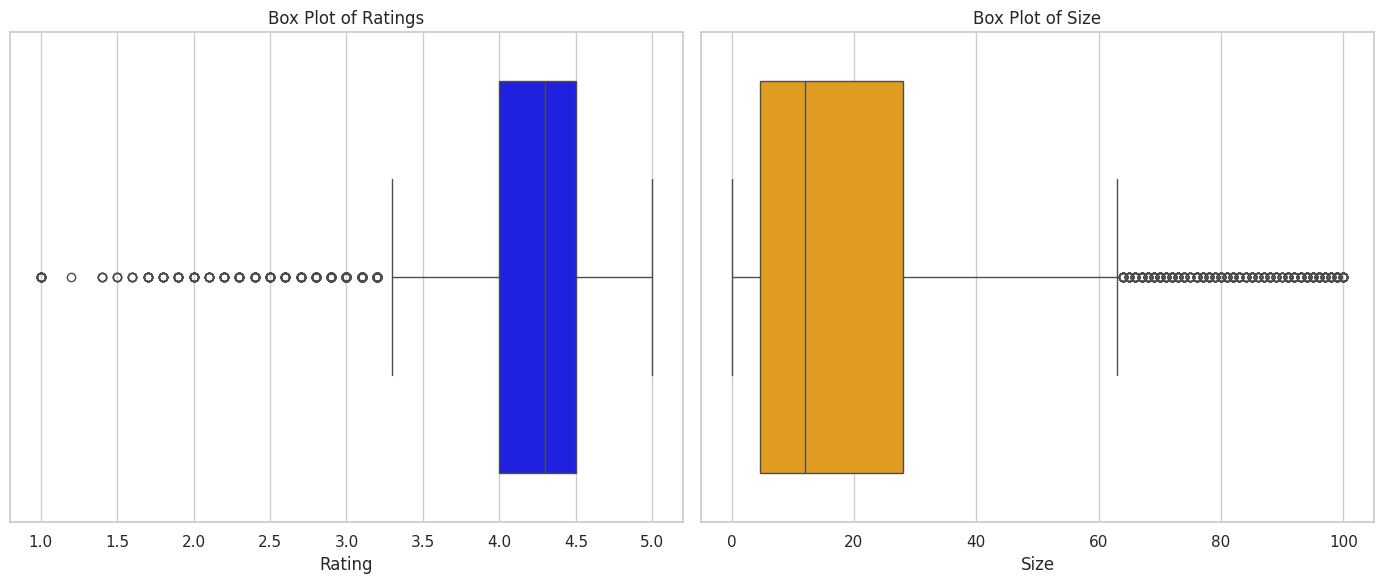

In [ ]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Box Plot for Ratings
sns.boxplot(x=apps_df['Rating'], ax=axs[0], color='blue')
axs[0].set_title('Box Plot of Ratings')

# Box Plot for Size
sns.boxplot(x=apps_df['Size'], ax=axs[1], color='orange')
axs[1].set_title('Box Plot of Size')

plt.tight_layout()
plt.show()

Since rating and size have significant outliers, it's best to use median to handle missing values

In [ ]:
apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)
apps_df['Size'].fillna(apps_df['Size'].median(), inplace=True)

<ipython-input-14-bae55702ec14>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['Rating'].fillna(apps_df['Rating'].median(), inplace=True)
<ipython-input-14-bae55702ec14>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
print(apps_df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
duplicates = apps_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


**Check data types**

In [ ]:
print(apps_df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [ ]:
# Clean Installs
apps_df['Installs'] = apps_df['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

# Clean Price
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)

In [ ]:
apps_df['Last Updated'] = pd.to_datetime(apps_df['Last Updated'], errors='coerce')

#**Category Exploration**

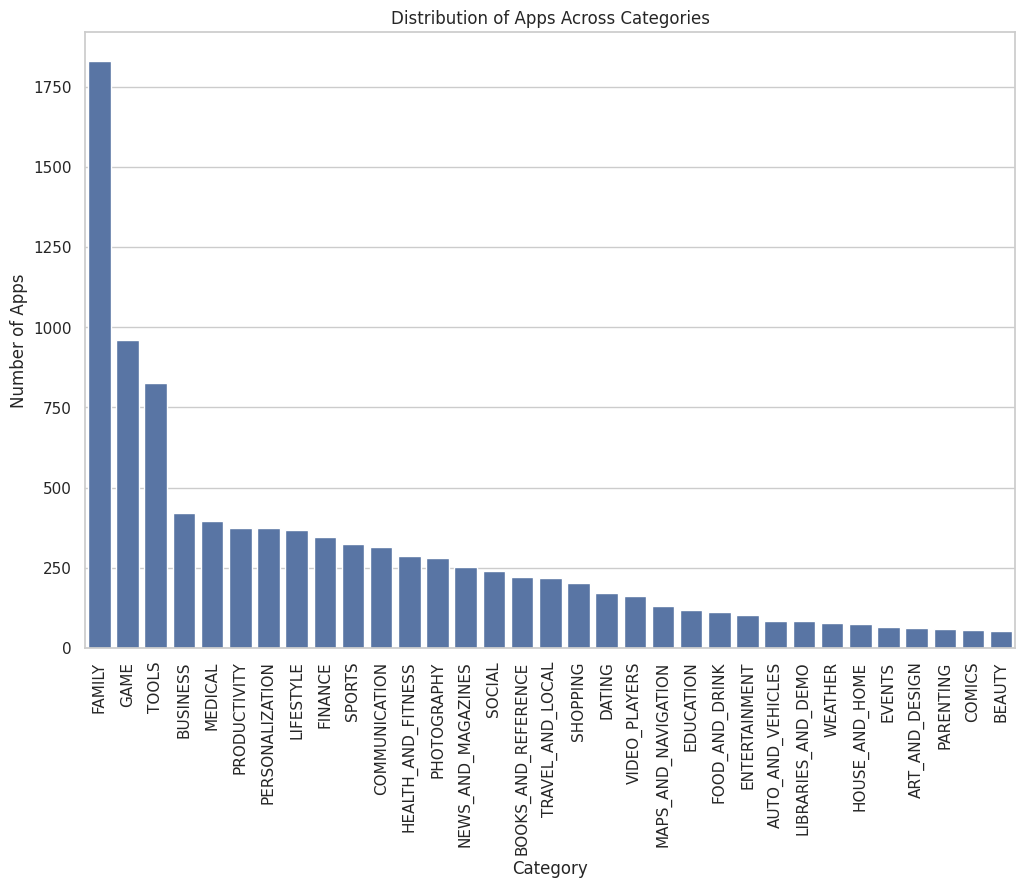

In [ ]:
#number of apps per category
app_counts = apps_df['Category'].value_counts()

# bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=app_counts.index, y=app_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Apps Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()

The FAMILY category has a significantly higher number of apps than the other categories with Game and Tools at 2nd and 3rd place respectively.

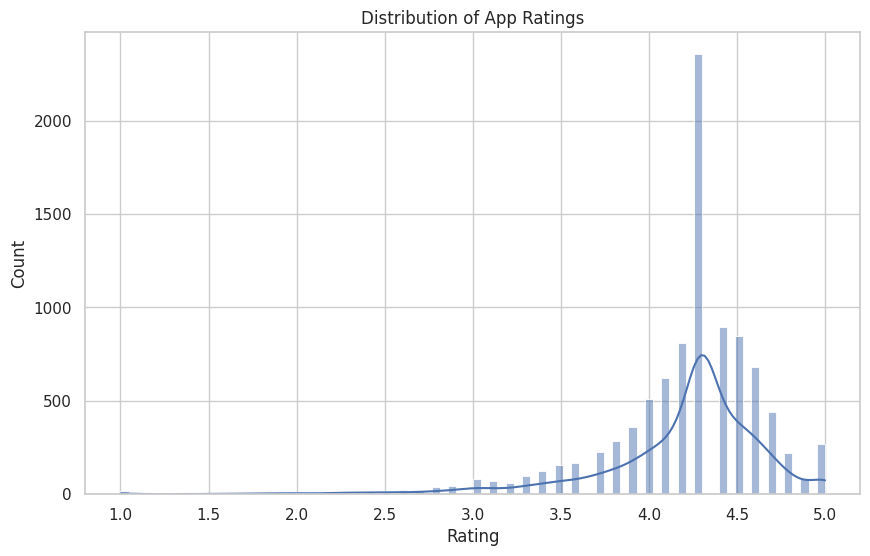

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(apps_df['Rating'], kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

The majority of the apps have a rating between 4.0 and 5.0 with a peak around 4.3 suggesting that this is the most common rating for the apps in the dataset

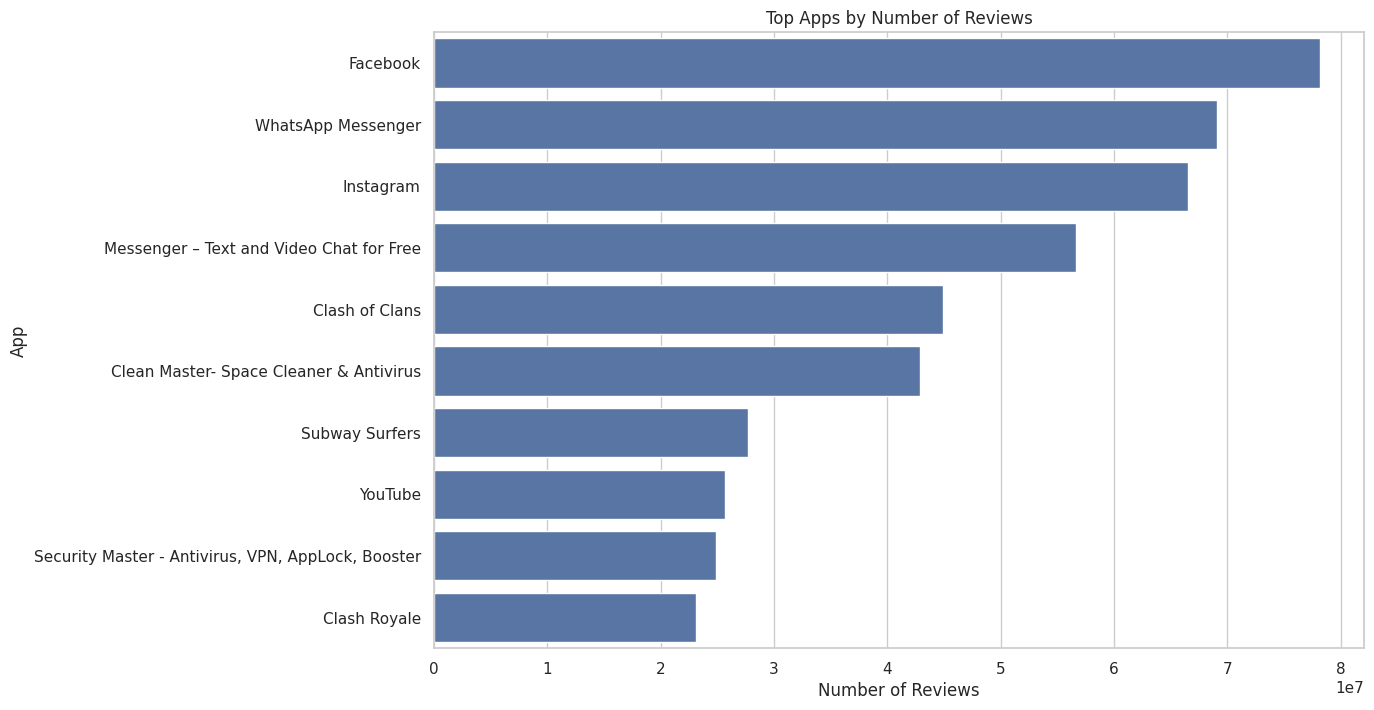

In [ ]:
# Sorting apps by the number of reviews
top_apps = apps_df.sort_values('Reviews', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Reviews', y='App', data=top_apps, orient='h')
plt.title('Top Apps by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('App')
plt.show()

We can see from the above bar chart that the most reviewed app is Facebook.

#**Metrics Analysis**

**Average rating by category**

In [ ]:
avg_ratings_by_category = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
print(avg_ratings_by_category)

Category
EVENTS                 4.395313
ART_AND_DESIGN         4.373016
EDUCATION              4.363866
BOOKS_AND_REFERENCE    4.334389
PERSONALIZATION        4.324866
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
GAME                   4.249948
WEATHER                4.248101
SHOPPING               4.237624
SPORTS                 4.232923
LIBRARIES_AND_DEMO     4.208434
PRODUCTIVITY           4.206150
AUTO_AND_VEHICLES      4.205882
MEDICAL                4.202025
FAMILY                 4.194369
FOOD_AND_DRINK         4.192857
COMICS                 4.185714
HOUSE_AND_HOME         4.174324
BUSINESS               4.173810
PHOTOGRAPHY            4.166548
NEWS_AND_MAGAZINES     4.156693
COMMUNICATION          4.154921
FINANCE                4.138551
ENTERTAINMENT          4.135294
LIFESTYLE              4.131436
TRAVEL_AND_LOCAL       4.103196
TOOLS                  4.073455
VIDEO_PLAYERS          4.068098

This shows us which categories are performing better and which ones are satisfactory.

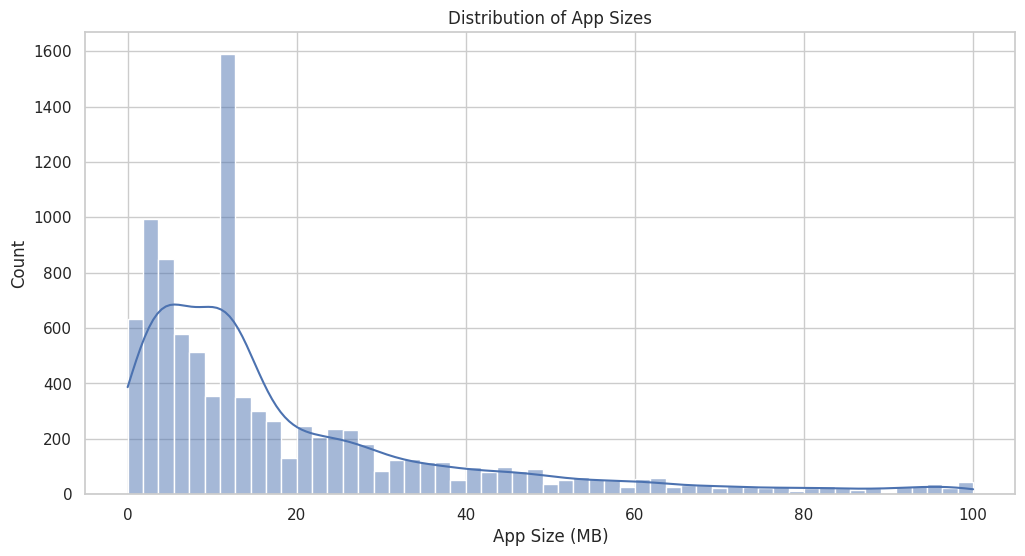

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(apps_df['Size'], kde=True)
plt.title('Distribution of App Sizes')
plt.xlabel('App Size (MB)')
plt.ylabel('Count')
plt.show()

Most of the apps are of smaller size.

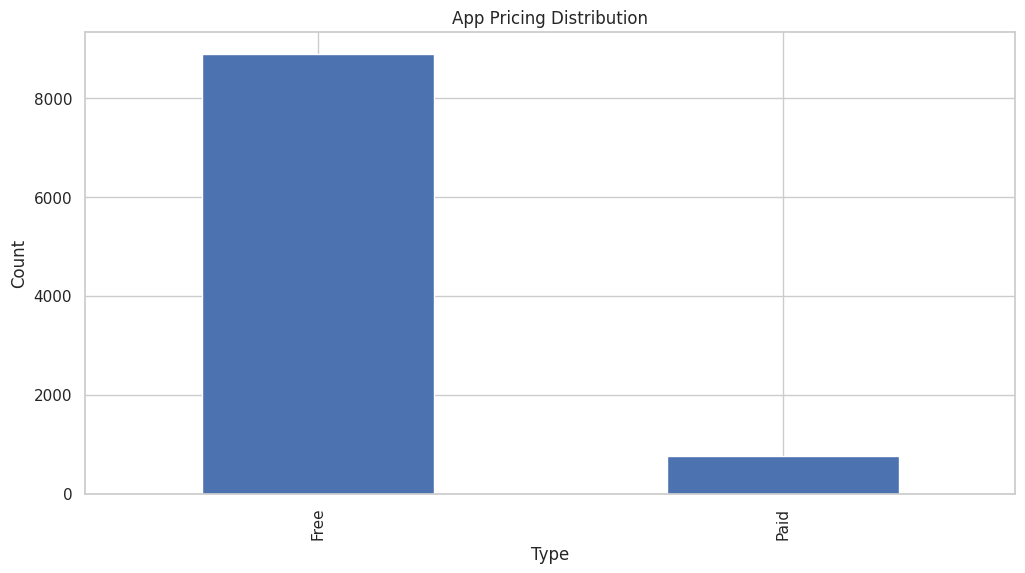

In [ ]:
price_counts = apps_df['Type'].value_counts().sort_index()
price_counts.plot(kind='bar', figsize=(12, 6))
plt.title('App Pricing Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

This shows that the android app market is dominated by free apps with the paid apps constituting a smaller portion of the app market. This indicates that user prefer Free apps over Paid apps.

            Rating   Reviews      Size  Installs
Rating    1.000000  0.050212  0.037382  0.034306
Reviews   0.050212  1.000000  0.066151  0.625158
Size      0.037382  0.066151  1.000000  0.030472
Installs  0.034306  0.625158  0.030472  1.000000


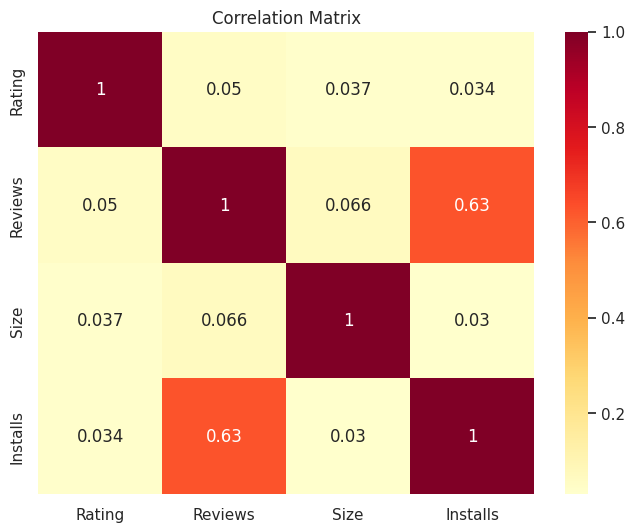

In [ ]:
corr_matrix = apps_df[['Rating', 'Reviews', 'Size', 'Installs']].corr()
print(corr_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

#**Sentimental Analysis**

In [ ]:
reviews_df = pd.read_csv('user_reviews.csv')

In [ ]:
print(reviews_df.dtypes)

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [ ]:
print("Shape of the dataset:", reviews_df.shape)

Shape of the dataset: (64295, 5)


In [ ]:
print(reviews_df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [ ]:
reviews_df['Translated_Review'].fillna('No review available', inplace=True)
reviews_df['Sentiment'].fillna('Neutral', inplace=True)
reviews_df['Sentiment_Polarity'].fillna(reviews_df['Sentiment_Polarity'].mean(), inplace=True)
reviews_df['Sentiment_Subjectivity'].fillna(reviews_df['Sentiment_Subjectivity'].mean(), inplace=True)

<ipython-input-56-a6dfdaf9c5bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df['Translated_Review'].fillna('No review available', inplace=True)
<ipython-input-56-a6dfdaf9c5bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [ ]:
print(reviews_df.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


#**Data preprocessing**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords


nltk.download('stopwords')

def preprocess_text(text):
    # lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    return text

reviews_df['Translated_Review'] = reviews_df['Translated_Review'].apply(preprocess_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from textblob import TextBlob

reviews_df['Sentiment_Polarity'] = reviews_df['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews_df['Sentiment_Subjectivity'] = reviews_df['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
print(reviews_df[['Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())

                                   Translated_Review  Sentiment_Polarity  \
0  like eat delicious food thats im cooking food ...                1.00   
1         help eating healthy exercise regular basis                0.25   
2                                          available                0.40   
3         works great especially going grocery store                0.40   
4                                       best idea us                1.00   

   Sentiment_Subjectivity  
0                0.533333  
1                0.288462  
2                0.400000  
3                0.875000  
4                0.300000  


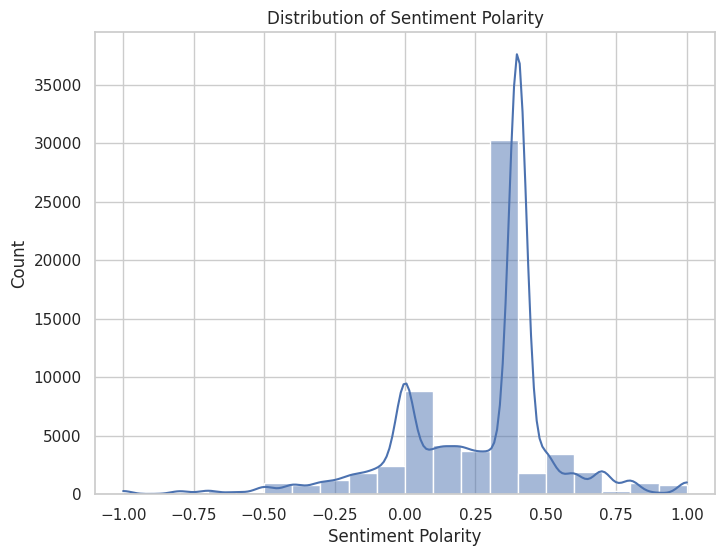

In [ ]:
# Distribution of Sentiment Polarity
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


The distribution of sentiments leans towards the positive side which suggests that most sentiments are slightly positive but there are a good amount that are neutral.

Instances of extreme postive or extreme negative are small.


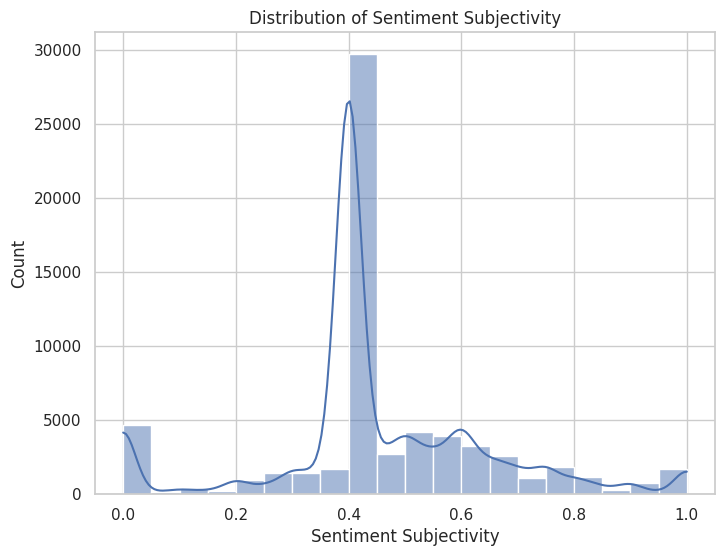

In [ ]:
# Distribution of Sentiment Subjectivity
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment_Subjectivity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Count')
plt.show()

In [ ]:
sentiment_by_app = reviews_df.groupby('App')['Sentiment_Polarity'].mean().sort_values(ascending=False)
print(sentiment_by_app)

App
850 Sports News Digest                0.529877
Goldstar: Live Event Tickets          0.523537
Cookbook Recipes                      0.515150
Brasileirão Pro 2018 - Série A e B    0.511875
Hipmunk Hotels & Flights              0.494740
                                        ...   
Claro                                -0.077143
HTC Social Plugin - Facebook         -0.081423
Be A Legend: Soccer                  -0.090848
Bancomer móvil                       -0.096302
Guns of Glory                        -0.167248
Name: Sentiment_Polarity, Length: 1074, dtype: float64


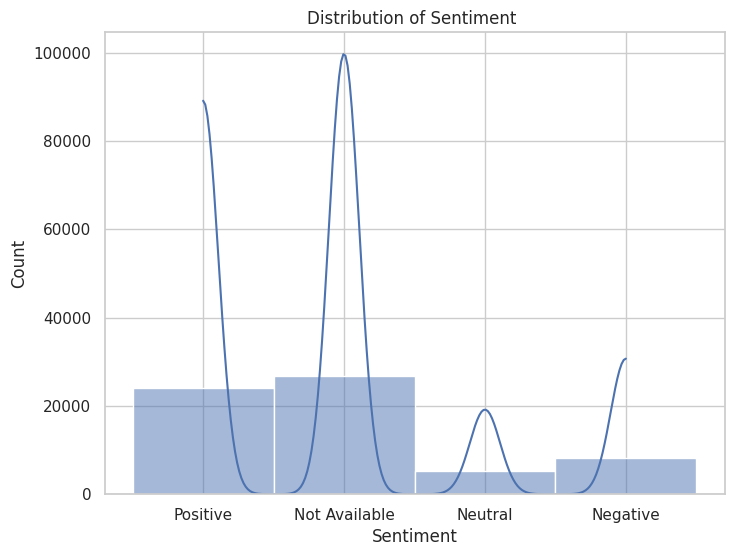

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


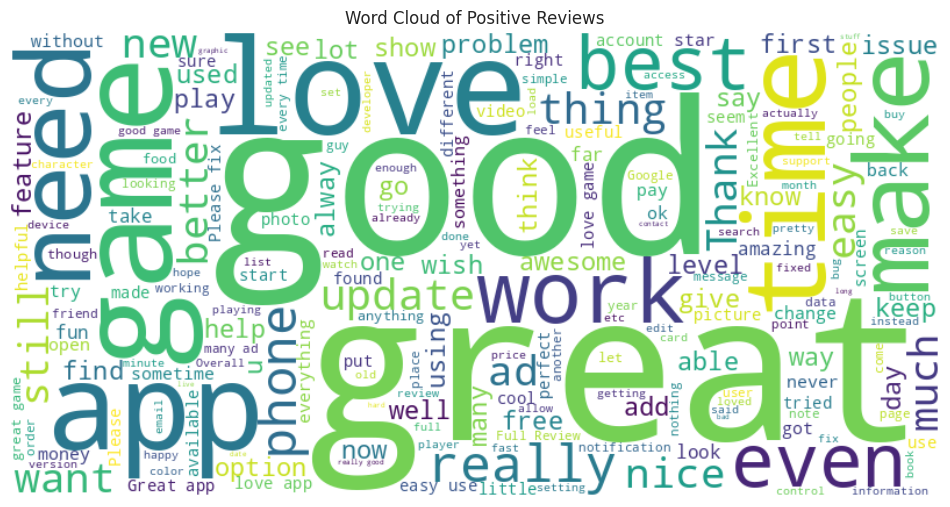

In [ ]:
from wordcloud import WordCloud

# Positive reviews
positive_reviews = ' '.join(reviews_df[reviews_df['Sentiment_Polarity'] > 0]['Translated_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()



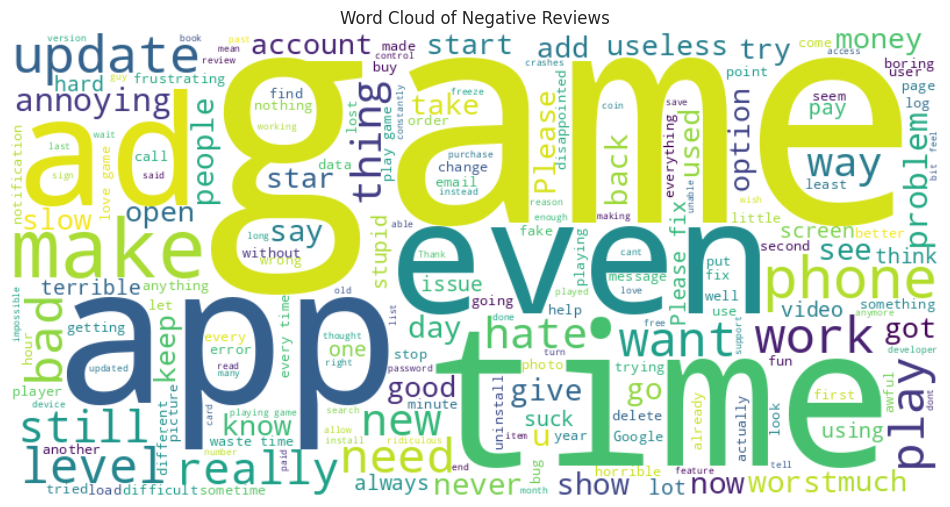

In [ ]:
from wordcloud import WordCloud
# Negative reviews
negative_reviews = ' '.join(reviews_df[reviews_df['Sentiment_Polarity'] < 0]['Translated_Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Reviews')
plt.show()

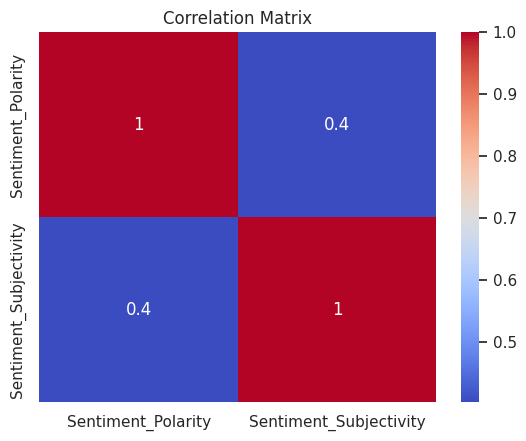

In [ ]:
correlation_matrix = reviews_df[['Sentiment_Polarity', 'Sentiment_Subjectivity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#**Interactive Visualization**

**Using Dash**

In [ ]:

!pip install dash
!pip install jupyter-dash

from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go

data = {
    'App': ['10 Best Foods For You', '21-Day Meditation Experience', '10 Best Foods For You', '21-Day Meditation Experience', '10 Best Foods For You'],
    'Translated_Review': ['Amazing', 'Cool', 'Best way', 'Great experience. User friendly navigation', 'good nice'],
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Neutral', 'Positive'],
    'Sentiment_Polarity': [1, -0.2, 0.25, 0, 0.4],
}

reviews_df = pd.DataFrame(data)

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("App Review Dashboard"),
    dcc.Dropdown(
        id='app-dropdown',
        options=[{'label': app_name, 'value': app_name} for app_name in reviews_df['App'].unique()],
        value='10 Best Foods For You'
    ),
    dcc.Graph(id='sentiment-graph')
])

@app.callback(
    dash.dependencies.Output('sentiment-graph', 'figure'),
    [dash.dependencies.Input('app-dropdown', 'value')]
)
def update_sentiment_graph(app_name):
    filtered_df = reviews_df[reviews_df['App'] == app_name]
    sentiment_counts = filtered_df['Sentiment'].value_counts()

    fig = go.Figure()
    fig.add_trace(go.Bar(x=sentiment_counts.index, y=sentiment_counts.values))
    fig.update_layout(title="User Sentiment", xaxis_title="Sentiment", yaxis_title="Count")
    return fig

app.run_server(mode='inline', debug=True, port=8051)

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Using plotly**

In [ ]:
!pip install plotly

import plotly.express as px

data = {
    'App': ['10 Best Foods For You', '21-Day Meditation Experience', '10 Best Foods For You', '21-Day Meditation Experience', '10 Best Foods For You'],
    'Translated_Review': ['Amazing', 'Cool', 'Best way', 'Great experience. User friendly navigation', 'good nice'],
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Neutral', 'Positive'],
    'Sentiment_Polarity': [1, -0.2, 0.25, 0, 0.4],

}


reviews_df = pd.DataFrame(data)

sentiment_counts = reviews_df['Sentiment'].value_counts()
fig1 = px.bar(sentiment_counts, x=sentiment_counts.index, y=sentiment_counts.values,
               labels={'x': 'Sentiment', 'y': 'Count'},
               title='Sentiment Distribution')
fig1.show()



In [ ]:

fig2 = px.scatter(reviews_df, x='App', y='Sentiment_Polarity', color='Sentiment',
                  title='Sentiment Polarity by App',
                  labels={'Sentiment_Polarity': 'Polarity', 'App': 'Application'})
fig2.show()



In [ ]:
fig3 = px.pie(reviews_df, names='Sentiment', title='Sentiment Distribution',
               color='Sentiment', color_discrete_sequence=px.colors.sequential.RdBu)
fig3.show()

Overall, we can observe that most of the sentiments expressed are positive.